# Pre-trained model ResNet

In [3]:
%matplotlib inline

import urllib
from PIL import Image

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt

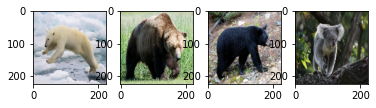

In [4]:
bears = [
    'https://upload.wikimedia.org/wikipedia/commons/3/3d/Polar_Bear_AdF.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/7/7d/Brown_bear.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/6/6e/Canadian_Rockies_-_the_bear_at_Lake_Louise.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/9/90/Koala_in_Zoo_Duisburg.jpg'
]

imgs = []

fig, axes = plt.subplots(nrows=1, ncols=len(bears))

for index, b in enumerate(bears):
    img = Image.open(urllib.request.urlopen(b))
    img = img.resize(size=(224, 224), resample=Image.NEAREST)
    _ = axes[index].imshow(img)
    imgs.append(img)


In [5]:
X = []
for i in imgs:
    x = image.img_to_array(i)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    X.append(x)

X = np.reshape(X, (4, 224, 224, 3))
print(np.shape(X))

(4, 224, 224, 3)


In [6]:
model = ResNet50(weights='imagenet')
preds = model.predict(X)

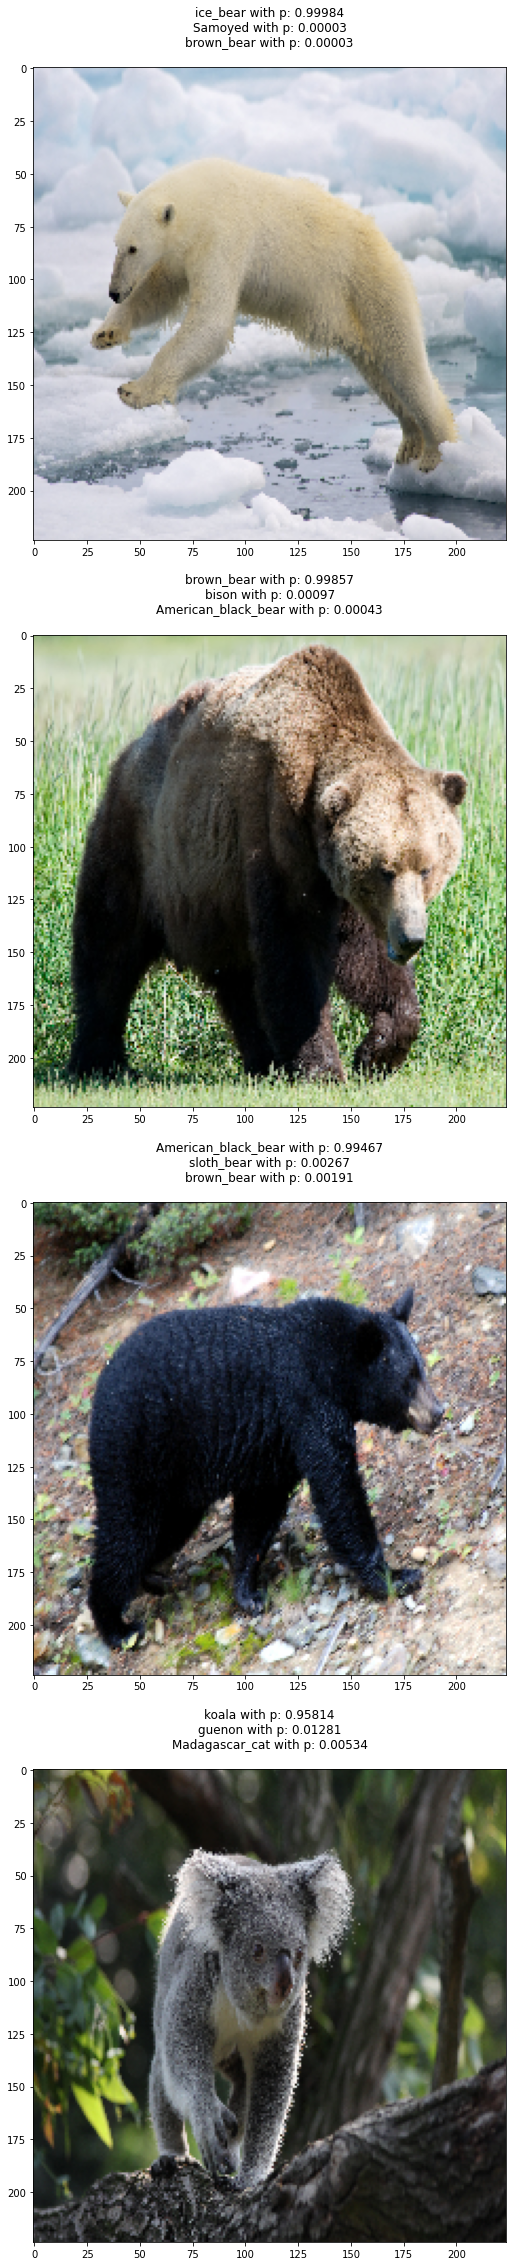

In [20]:
fig, axes = plt.subplots(nrows=len(bears), ncols=1, figsize=(10,40))

for index, predictions in enumerate(decode_predictions(preds, top=3)):
    
    axes[index].imshow(imgs[index])
   
    title = ''
    for p in predictions:
        tag = p[1]
        prob = p[2]
        title += '{} with p: {:.5f}\n'.format(tag, prob)
     
    axes[index].set_title(title)